## Indian House Price Prediction

### Objective
To Predict House Price Based on number of rooms, Property Type, Location Using Multiple Regression

### Importing Necessary Tools

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Reading Datasets into project

In [2]:
historyData = pd.read_csv('datasets/history.csv')
propertyData = pd.read_csv('datasets/property.csv')

historyData.head()


,Property_ID,Size(#rooms),Type,Location,Price
0,1,2,1,1,1480000
1,2,2,1,1,1035000
2,3,3,1,1,1465000
3,4,3,1,1,850000
4,5,4,1,1,1600000


### Understanding Dataset

We Have downloaded this dataset from kaggle (https://www.kaggle.com/suryavamsi62/indiahouseprice).

-     **Property_ID** eg. 2
-     **Size(#rooms)** eg. 3
-     **Type** eg. 1
-     **Location** eg. 2
-     **Price** eg. 850000


#### Checking if null values are present 

In [3]:
historyData.isnull().any()

Property_ID     False
Size(#rooms)    False
Type            False
Location        False
Price           False
dtype: bool

In [4]:
propertyData.isnull().any()

List_ID         False
Size(#rooms)    False
Type            False
Location        False
Price           False
dtype: bool

### Task 1: Plotting Different Graphs to visualize how price is changing depending upon different parameters

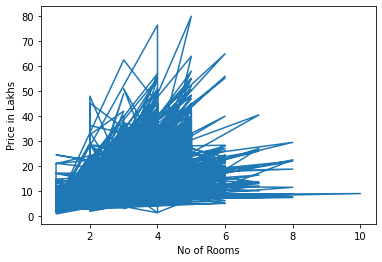

In [5]:
plt.plot(historyData['Size(#rooms)'],historyData['Price']/100000)
plt.xlabel('No of Rooms')
plt.ylabel('Price in Lakhs')
plt.show()

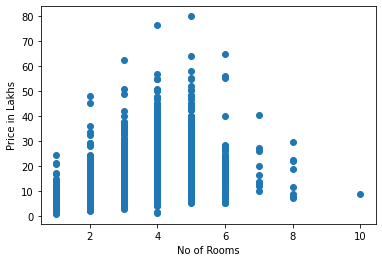

In [6]:
# Plotting Graph of Size(# rooms) vs Price

plt.scatter(historyData['Size(#rooms)'],historyData['Price']/100000)
plt.xlabel('No of Rooms')
plt.ylabel('Price in Lakhs')
plt.show()

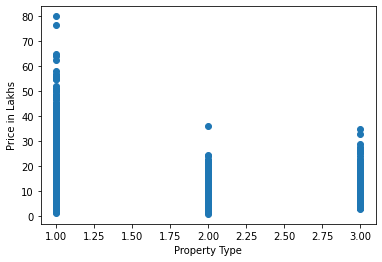

In [7]:
# Plotting Graph of Property Type vs Price

plt.scatter(historyData['Type'],historyData['Price']/100000)
plt.xlabel('Property Type')
plt.ylabel('Price in Lakhs')
plt.show()

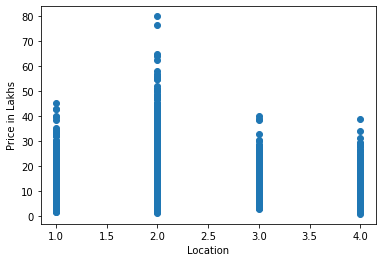

In [8]:
# Plotting Graph of Location vs Price

plt.scatter(historyData['Location'],historyData['Price']/100000)
plt.xlabel('Location')
plt.ylabel('Price in Lakhs')
plt.show()

### Task 2: training Linear Regression model with history Dataset 

In [9]:
from sklearn.linear_model import LinearRegression

X = historyData[['Size(#rooms)','Type','Location']]
y = historyData[['Price']]

model = LinearRegression()
model.fit(X,y)


LinearRegression()

### Task 3: Testing model with property Data and Analysing Accuracy Score

In [19]:
from sklearn.metrics import r2_score,accuracy_score
X_test = propertyData[['Size(#rooms)','Type','Location']]
y_test = propertyData[['Price']]


    
y_predict = model.predict(X_test)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

print("R2-score: %.2f" % r2_score(y_test , y_predict) )



Intercept: 
 [548701.76615759]
Coefficients: 
 [[ 317823.45720698 -159828.45817339  -73572.89212669]]
R2-score: 0.16


### Task 4: Developing Another Model with Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
cv.get_n_splits(X)

regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=cv)

array([0.5278495 , 0.55218981, 0.53299485, 0.52330014, 0.53655286,
       0.51144041, 0.51107279, 0.51704902, 0.55025631, 0.51585271])